In [1]:
from waggon.utils import display
from waggon.surrogates import DGP
from waggon.acquisitions import EI
from waggon import functions as f
from waggon.optim import SurrogateOptimiser

Optimisation loop started...:   0%|          | 0/100 [00:00<?, ?it/s]

Optimisation error: 17.7966:   0%|          | 0/100 [00:12<?, ?it/s] 

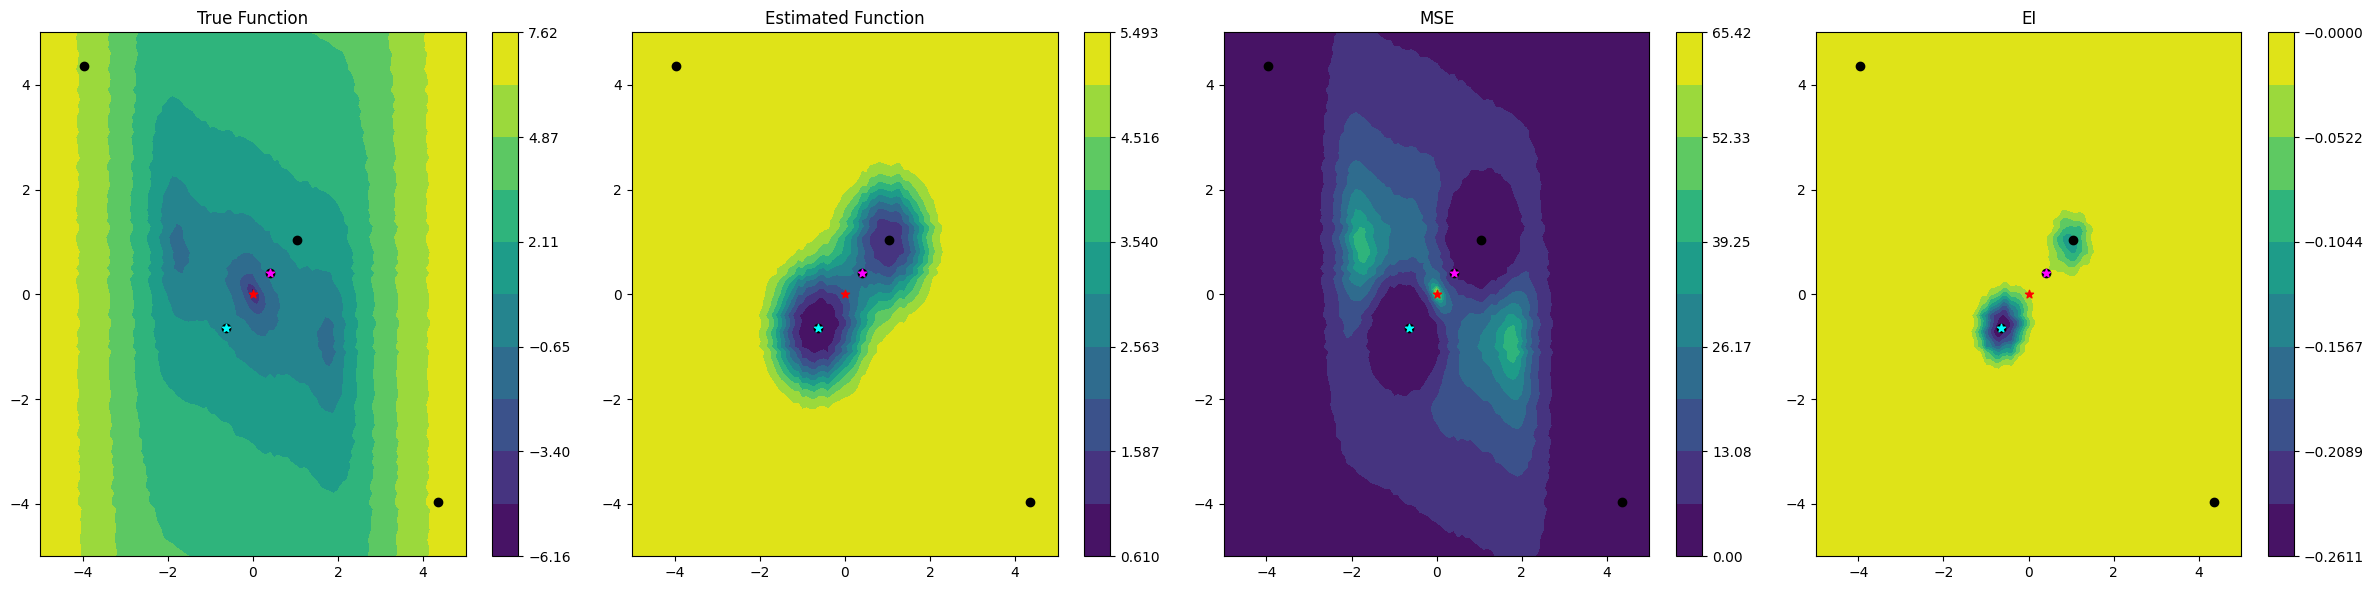

Optimisation error: 17.7630:   1%|          | 1/100 [00:32<41:37, 25.22s/it]

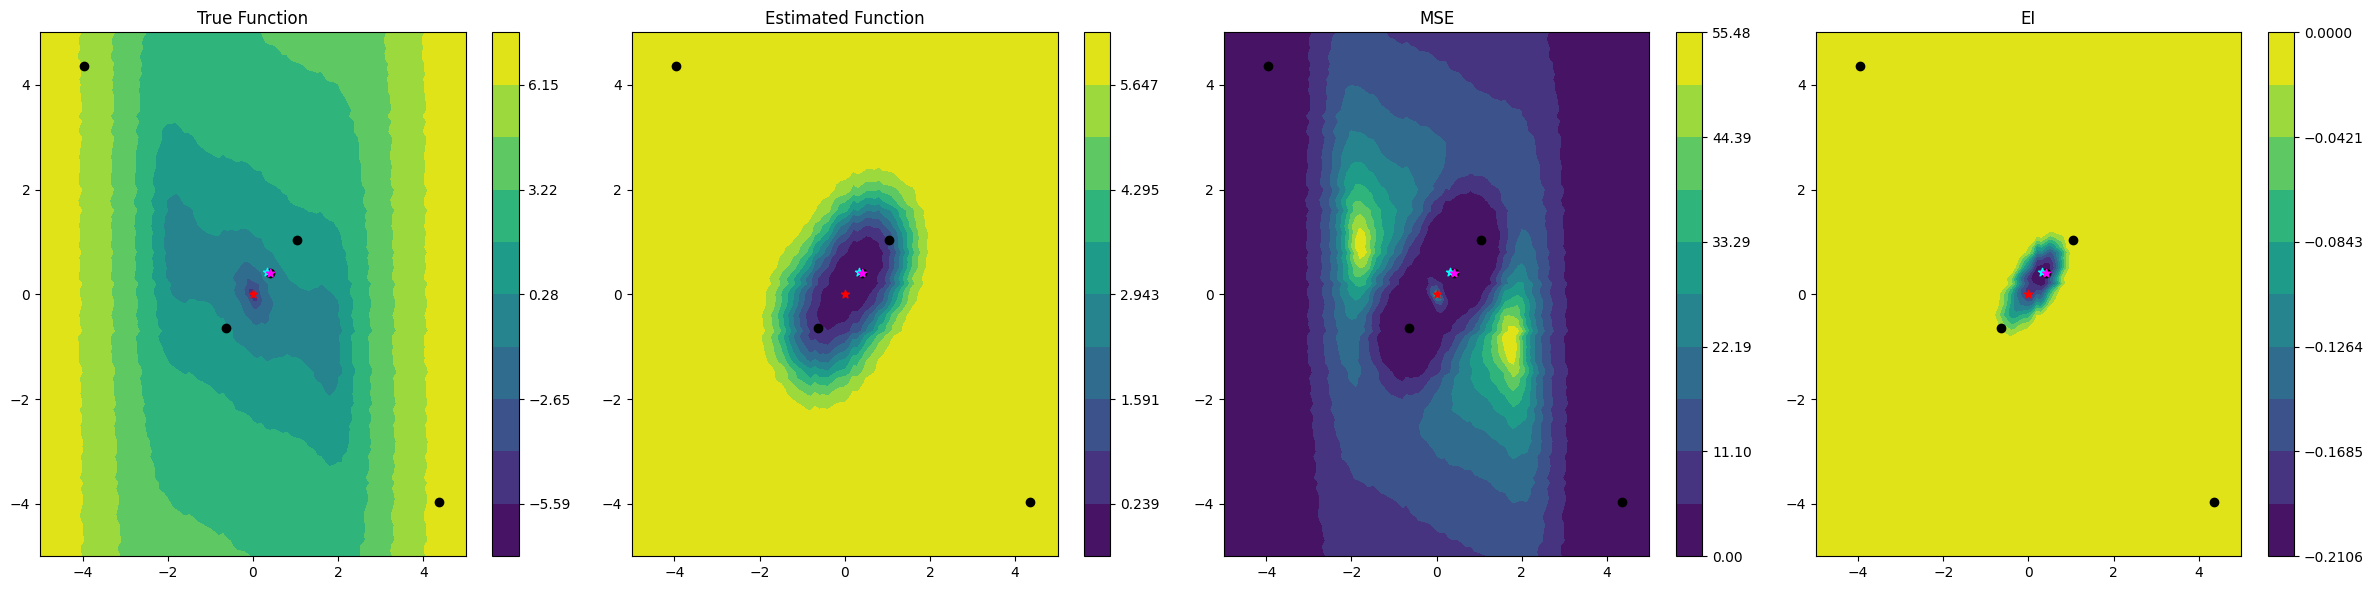

Optimisation error: 17.7630:   2%|▏         | 2/100 [00:48<39:56, 24.46s/it]


KeyboardInterrupt: 

In [4]:
opt = SurrogateOptimiser(func=f.three_hump_camel(n_obs=10),#22
                        surr=DGP(lr=1e-2, n_epochs=100, hidden_size=4, layers=['deep', 'deep']),# best: lr=1e-2, 7.62
                        acqf=EI(),
                        seed=2,
                        save_res=True, verbose=1, num_opt=False, error_type='f', plot_results=True, n_candidates=25)
_ = opt.optimise()
display(opt)